In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:80% !important;}
"""))


# NLTK

## NLTK 패키지

In [3]:
import nltk

In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [7]:
#말뭉치 리스트
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [10]:
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
emma[:20]

'[Emma by Jane Austen'

In [14]:
# sent_tokenize(): 문장 단위로 분류
from nltk.tokenize import sent_tokenize
sent_tokens = sent_tokenize(emma)
print(len(sent_tokens))
print("%r" % (sent_tokens[100]))#raw data

7493
'Mr. Knightley loves to find fault with me, you know--\nin a joke--it is all a joke.'


In [16]:
# word_tokenize(): 단어 단위로 분류
from nltk.tokenize import word_tokenize
word_tokens = word_tokenize(emma)
print(len(word_tokens))
print("%r" % (word_tokens[100]))#raw data

191785
'too'


In [17]:
#토큰화할 때 정규표현식 이용: regexptokenizer
from nltk.tokenize import RegexpTokenizer
ret = RegexpTokenizer('[\w]+')
print(ret.tokenize(sent_tokens[0]))

['Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her']


## 형태소(의미가 있는 가장 작은 말의 단위) 분석
- stemming: 어간 추출
- lemmatizing: 원형 복원
- part of speech tagging: 품사 태깅

In [21]:
words = ['sending', 'cooking', 'files', 'lives', 'crying', 'dying']
#어간 추출1: ParterStr
from nltk.stem import PorterStemmer
pst = PorterStemmer()
[pst.stem(word) for word in words] 

['send', 'cook', 'file', 'live', 'cri', 'die']

In [22]:
#어간 추출2: LancasterStemmer
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
[lst.stem(word) for word in words] 

['send', 'cook', 'fil', 'liv', 'cry', 'dying']

In [26]:
#어간 추출3: RegexpStemmer
from nltk.stem import RegexpStemmer
rst = RegexpStemmer('ing')
[rst.stem(word) for word in words] 

['send', 'cook', 'files', 'lives', 'cry', 'dy']

In [31]:
#어간 추출시 의미가 달라질 수 있어 원형 복원
words2 = ['believes', 'cooking']
[lst.stem(word) for word in words2]
#원형 복원
from nltk.stem.wordnet import WordNetLemmatizer
wl = WordNetLemmatizer()
[wl.lemmatize(word) for word in words2]

['belief', 'cooking']

In [32]:
#품사 태깅
from nltk.tag import pos_tag
tagged_list = pos_tag(word_tokenize(sent_tokens[10]))
print(word_tokenize(sent_tokens[10]))
print("품사 태깅 결과 \n", tagged_list)

['It', 'was', 'on', 'the', 'wedding-day', 'of', 'this', 'beloved', 'friend', 'that', 'Emma', 'first', 'sat', 'in', 'mournful', 'thought', 'of', 'any', 'continuance', '.']
품사 태깅 결과 
 [('It', 'PRP'), ('was', 'VBD'), ('on', 'IN'), ('the', 'DT'), ('wedding-day', 'NN'), ('of', 'IN'), ('this', 'DT'), ('beloved', 'VBN'), ('friend', 'NN'), ('that', 'WDT'), ('Emma', 'NNP'), ('first', 'RB'), ('sat', 'VBD'), ('in', 'IN'), ('mournful', 'JJ'), ('thought', 'NN'), ('of', 'IN'), ('any', 'DT'), ('continuance', 'NN'), ('.', '.')]


In [48]:
#EX
#1. 특수문자가 들어가지 않은 3글자 이상의 단어만 추출해서 품사 태깅을 하시오
ret = RegexpTokenizer('[\w]{3,}')
emma_tags = pos_tag(ret.tokenize(emma))
emma_tags

[('Emma', 'NNP'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 ('VOLUME', 'NNP'),
 ('CHAPTER', 'NNP'),
 ('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 ('handsome', 'VBD'),
 ('clever', 'NN'),
 ('and', 'CC'),
 ('rich', 'JJ'),
 ('with', 'IN'),
 ('comfortable', 'JJ'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happy', 'JJ'),
 ('disposition', 'NN'),
 ('seemed', 'VBD'),
 ('unite', 'JJ'),
 ('some', 'DT'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('blessings', 'NNS'),
 ('existence', 'NN'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('lived', 'VBN'),
 ('nearly', 'RB'),
 ('twenty', 'JJ'),
 ('one', 'CD'),
 ('years', 'NNS'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('with', 'IN'),
 ('very', 'RB'),
 ('little', 'JJ'),
 ('distress', 'NN'),
 ('vex', 'IN'),
 ('her', 'PRP$'),
 ('She', 'PRP'),
 ('was', 'VBD'),
 ('the', 'DT'),
 ('youngest', 'JJS'),
 ('the', 'DT'),
 ('two', 'CD'),
 ('daughters', 'NNS'),
 ('most', 'RBS'),
 ('affectionate', 'JJ'),
 ('indulgent', 'NN'),
 ('father', 'NN'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('consequ

In [54]:
#2. emma 단어의 품사 태깅이 어떤 품사들로 되어 있는지 출력
pos = set()
cnt=0
for emma_t in emma_tags:
    if emma_t[0] == 'Emma':
        cnt += 1
        pos.add(emma_t[1])
print(cnt)
print(pos)

865
{'VBN', 'NNPS', 'VBD', 'NNP', 'NN', 'VBP', 'NNS', 'JJ', 'RB', 'VB'}


In [58]:
import pandas as pd
pos_cnt = pd.Series([0]*len(pos), index=list(pos))
for emma_t in emma_tags:
    if emma_t[0] == 'Emma':
        pos_cnt[emma_t[1]] += 1
pos_cnt

VBN       1
NNPS      2
VBD       1
NNP     838
NN        7
VBP       4
NNS       2
JJ        4
RB        1
VB        5
dtype: int64

In [61]:
#3. 원하는 품사만 뽑아 출력
nouns_list = [emma_t[0] for emma_t in emma_tags if emma_t[1]=='NN']
print(len(nouns_list))
print(len(set(nouns_list)))#중복 제거


18554
2738


In [62]:
words = ret.tokenize(emma)

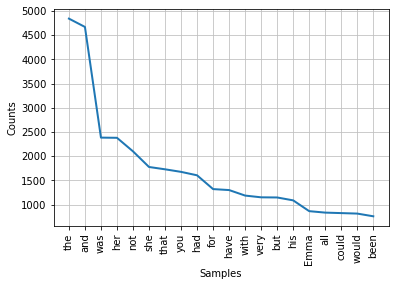

In [66]:
from nltk import Text
emma_test = Text(words)
emma_test.plot(20)